1. 마지막 일자를 기준으로 인구 대비 확진자 비율이 높은 상위 5개 국가를 구하여라. 

- 상위 5개 국가별로 누적 확진자, 일일 확진자, 누적 사망자, 일일 사망자, 그래프, 범례를 이용해 가독성 있게 만들어라.

In [2]:
import pandas as pd
df = pd.read_csv('problem2.csv')
df.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations
0,Afghanistan,2020-02-24,5.0,NaN,NaN,39835428.0,NaN
1,Afghanistan,2020-02-25,5.0,NaN,NaN,39835428.0,NaN
2,Afghanistan,2020-02-26,5.0,NaN,NaN,39835428.0,NaN
3,Afghanistan,2020-02-27,5.0,NaN,NaN,39835428.0,NaN
4,Afghanistan,2020-02-28,5.0,NaN,NaN,39835428.0,NaN


In [3]:
df.isna().sum()

location                 0
date                     0
total_cases           7588
total_deaths         18857
new_tests            79870
population             980
new_vaccinations    107517
dtype: int64

In [4]:
df = df.fillna(0)
df.isna().sum()

location            0
date                0
total_cases         0
total_deaths        0
new_tests           0
population          0
new_vaccinations    0
dtype: int64

In [5]:
df['ratio'] = df['total_cases']/df['population']
df.head()

,location,date,total_cases,total_deaths,new_tests,population,new_vaccinations,ratio
0,Afghanistan,2020-02-24,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07
1,Afghanistan,2020-02-25,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07
2,Afghanistan,2020-02-26,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07
3,Afghanistan,2020-02-27,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07
4,Afghanistan,2020-02-28,5.0,0.0,0.0,39835428.0,0.0,1.255164e-07


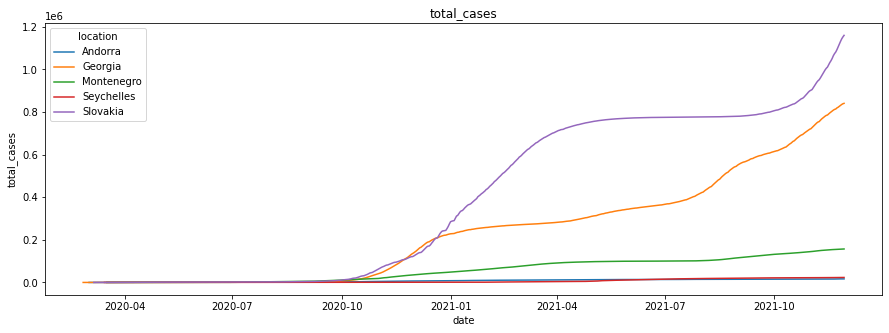

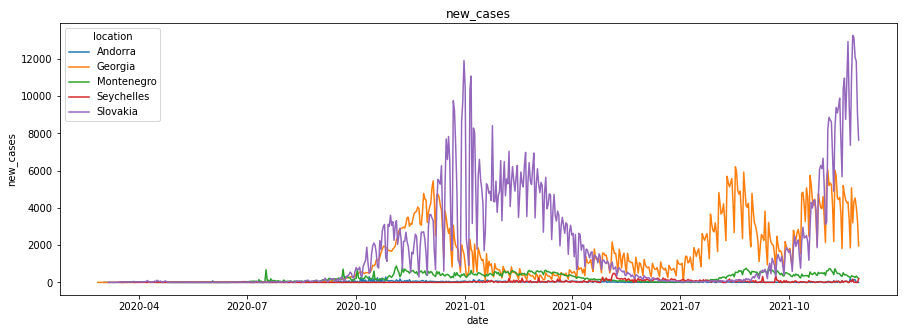

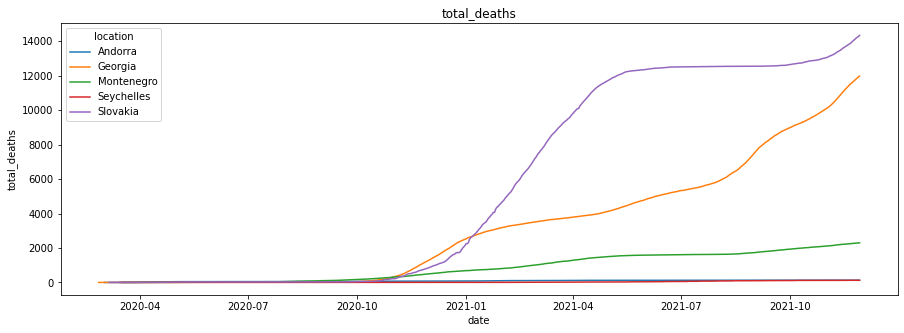

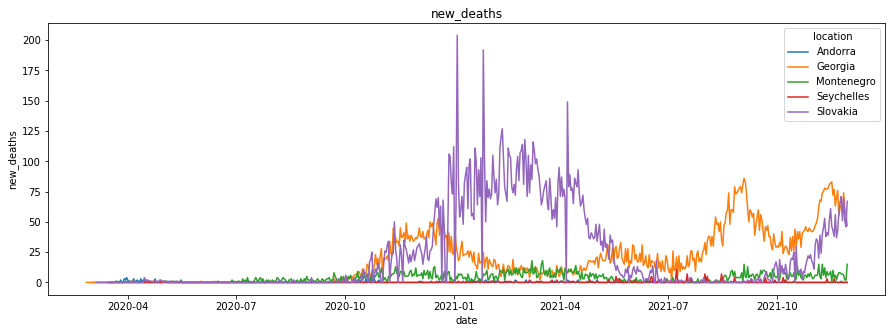

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


df['date'] = pd.to_datetime(df['date'])
df = df[df.date != pd.to_datetime('2021-11-30')]
df = df[df.population != 0]

for location in df.location.unique():
    lo = df[df.location == location]
    df.loc[lo.index,'new_cases'] = lo.total_cases.diff().values
    df.loc[lo.index[0], 'new_cases'] = lo['total_cases'].values[0]
    
    df.loc[lo.index,'new_deaths'] = lo.total_deaths.diff().values
    df.loc[lo.index[0],'new_deaths'] = lo['total_deaths'].values[0]
    
    df.loc[lo.index, 'total_vacciantions'] = lo['new_vaccinations'].cumsum().values
    df.loc[lo.index,'7days_new_case'] = lo['new_tests'].rolling(7).sum().fillna(0).values
    
locations = df.groupby(['location']).tail(1).sort_values('ratio',ascending=False).location.head(5).values
target = df[df.location.isin(locations)].reset_index(drop=True)

for v in ['total_cases','new_cases','total_deaths','new_deaths']:
    plt.figure(figsize=(15,5))
    plt.title(v)
    sns.lineplot(data=target,x='date',y=v,hue='location')
    plt.show()